In [1]:
from pylab import plot,show
from numpy import vstack,array
from numpy.random import rand
import numpy as np
from scipy.cluster.vq import kmeans,vq
import pandas as pd
import pandas_datareader as dr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

C:\Users\HIT-2233\Anaconda3\envs\py36\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
sp500_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'

#read in the url and scrape ticker data
data_table = pd.read_html(sp500_url)

In [21]:
tickers = data_table[0]['Symbol'].tolist()
prices_list = []

In [22]:
tickers = tickers[0:10]

In [23]:
for ticker in tickers:
    try:
        prices = dr.DataReader(ticker,'yahoo','01/01/2017')['Adj Close']
        prices = pd.DataFrame(prices)
        prices.columns = [ticker]
        prices_list.append(prices)
    except:
        pass
    prices_df = pd.concat(prices_list,axis=1)

prices_df.sort_index(inplace=True)

prices_df.head()

,MMM,ABT,ABBV,ABMD,ACN,ATVI,ADBE,AMD,AAP,AES
Date,,,,,,,,,,
2017-01-03,160.878021,36.556423,52.551662,112.360001,109.816139,35.706703,103.480003,11.43,168.627762,10.091925
2017-01-04,161.121964,36.846622,53.292667,115.739998,110.080170,36.408356,104.139999,11.43,170.011581,10.005373
2017-01-05,160.570786,37.164909,53.696846,114.809998,108.430000,36.973591,105.910004,11.24,169.892990,9.875546
2017-01-06,161.040649,38.175949,53.713688,115.419998,109.665268,36.944351,108.300003,11.32,167.668976,10.230409
2017-01-09,160.173203,38.138512,54.067345,117.110001,108.439430,36.739704,108.570000,11.49,167.570175,9.979407


In [24]:
#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = prices_df.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = prices_df.pct_change().std() * sqrt(252)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

Text(0.5, 1.0, 'Elbow curve')

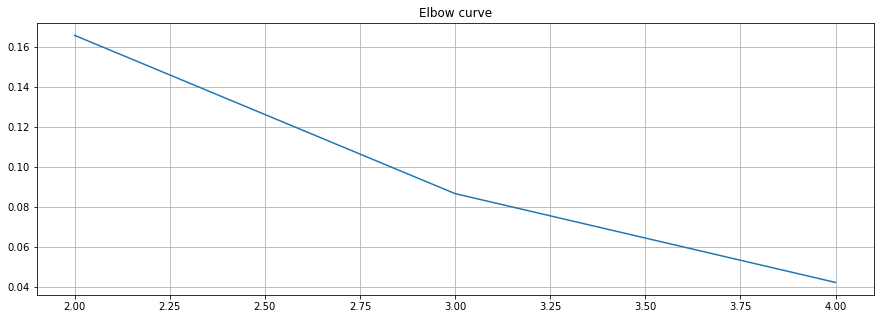

In [25]:
X = data
distorsions = []
for k in range(2, 5):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

Text(0.5, 1.0, 'Elbow curve')

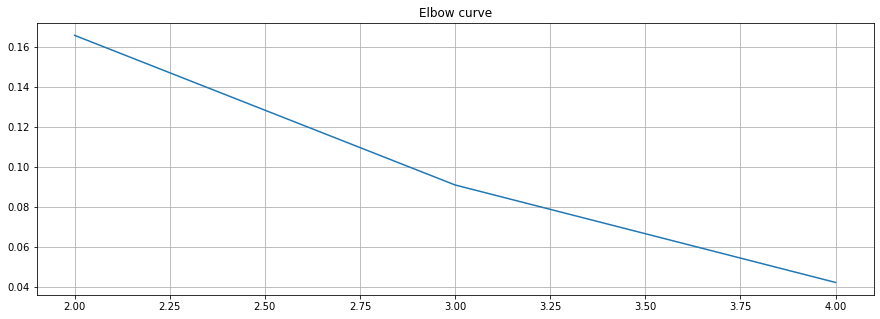

In [26]:
X = data
distorsions = []
for k in range(2, 5):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    distorsions.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 5), distorsions)
plt.grid(True)
plt.title('Elbow curve')

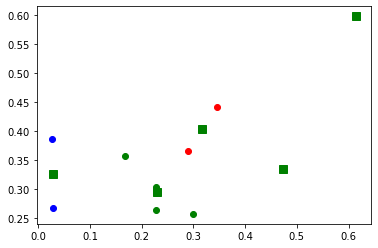

In [27]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

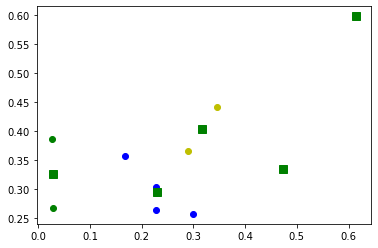

In [28]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [29]:
#identify the outlier
print(returns.idxmax())

Returns       AMD
Volatility    AMD
dtype: object


In [30]:
#drop the relevant stock from our data
returns.drop('AMD',inplace=True)

#recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

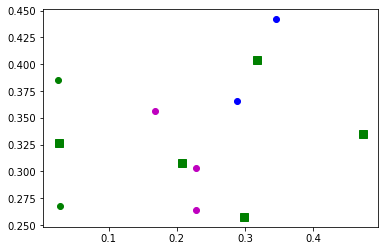

In [31]:
# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(data,5)
# assign each sample to a cluster
idx,_ = vq(data,centroids)

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

In [32]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

for detail in details:
    print(detail)

('MMM', 3)
('ABT', 2)
('ABBV', 4)
('ABMD', 0)
('ACN', 4)
('ATVI', 0)
('ADBE', 1)
('AAP', 3)
('AES', 4)


* reference
    * [stock-clusters-using-k-means-algorithm](https://www.pythonforfinance.net/2018/02/08/stock-clusters-using-k-means-algorithm-in-python/)